# Neural & Behavioral Modeling - Week 1 (Exercises)
by 林子堯 (r08227112@ntu.edu.tw)

In [6]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
# |=========
import tabulate as tb
import sympy as sym
# =========|

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex.

### 1.1 Insert your codes to complete the simulation (2 points)

Finish! The number of iteration is 9.

  Female    Male
--------  ------
       4       0
       0      25
       0       1
       8       0
       0       2
      21       0
       2       0
       0      23
      14       0


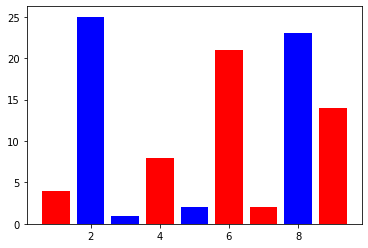

In [149]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.25 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    # |=========
    # counts=zeros((max(groups)+1,max(sexes)+1))
    counts = zeros((max(groups)+1, 2))
    # =========|
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group

# |=========
counts, proportions = party_stats(people) # initial property
Nhappy = sum(counts[proportions > (1-Tolerance)])
Niteration = 0 # count number of interations
# =========|

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    # |=========
    for i in range(Npeople):
        # Every person will leave if Pr(opp.sex) > Tolerance, it is equvilant to Pr(same.sex) <= 1-Tolerance
        if proportions[people[i].group, people[i].sex] < (1-Tolerance):  
            people[i].leave() # unhappy person will leave
    # =========|

    # Plot new results:
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)

    # |=========
    Nhappy = sum(counts[proportions > (1-Tolerance)])
    Niteration += 1
    # =========|

# |=========
print("Finish! The number of iteration is %d.\n" % Niteration)
print(tb.tabulate(counts, headers = ["Female", "Male"]))
# =========|

### 1.2 Modify the three model parameters & discuss how each affects your simulations (2 points)

In [189]:
def party(Ngroups, Npeople, Tolerance, max_iteration = 100):
    people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
    counts, proportions = party_stats(people) # initial property
    Nhappy = sum(counts[proportions > (1-Tolerance)])
    Niteration = 0 # count number of interations    
    # Simulation:
    while(Nhappy < Npeople): # Simulation stops when everyone is happy
        for i in range(Npeople):
            # Every person will leave if Pr(opp.sex) > Tolerance, it is equvilant to Pr(same.sex) <= 1-Tolerance
            if proportions[people[i].group, people[i].sex] < (1-Tolerance):  
                people[i].leave()
        # Plot new results:
        counts, proportions=party_stats(people) # size=group*sex
        Nhappy = sum(counts[proportions > (1-Tolerance)])
        Niteration += 1
        if Niteration > max_iteration:
            break
    return({"Niteration": Niteration, "counts": counts, "proportions": proportions})


def plot_party_subplot(counts_list, var, value_list):
    Nlist = len(counts_list)
    fig = figure(figsize = (4*Nlist, 4))
    rcParams["figure.figsize"] = (4*Nlist, 4)
    fig, axs = subplots(1, Nlist)
    for i in range(Nlist):
        counts = counts_list[i]
        x = arange(len(counts)) + 1 # number of groups
        axs[i].bar(x, counts[:,0], color = 'r') # women
        axs[i].bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot\
        title_name = "%s = %s" % (var, value_list[i])
        axs[i].set_title(title_name)
    fig.show()
    rcParams["figure.figsize"] = (6, 4)

#### Change Npeople size

I change the number of people (Npeople) from 50 to 500 by 5o to run the party simulation, where the maximum iteration number is 500 to avoid infinite loops. The result is as follow

(where Ngroups = 10, Tolerance = 0.25)

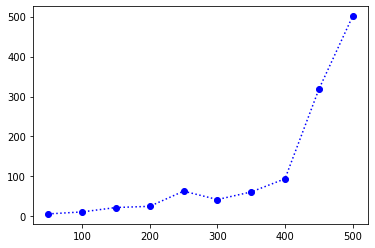

In [150]:
random.seed(9999)
Npeople_list = arange(50, 501, 50)
Npeople_result_list = [party(Ngroups = 10, Npeople = Npeople, Tolerance = 0.25, max_iteration = 500) for Npeople in Npeople_list]
iterations = [result["Niteration"] for result in Npeople_result_list]
plot(Npeople_list, iterations,'b:o')

We can find that the iteration number increases as the number of people increases. 

If we check the finial state in Npeople = 50, 200, 400, 500 respetively, 

<Figure size 1152x288 with 0 Axes>

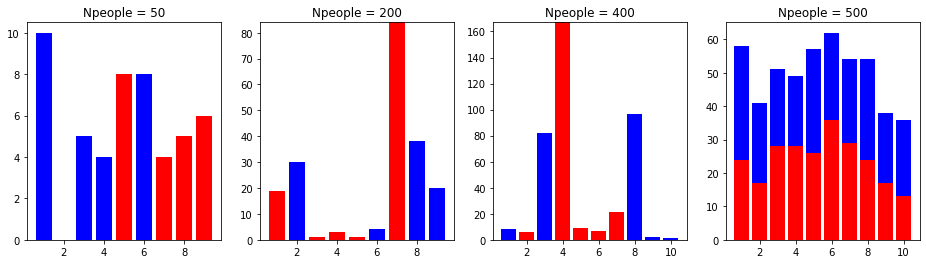

In [190]:
Npeople_selected = [50, 200, 400, 500]
Npeople_index = array(Npeople_selected) / 50 - 1
Npeople_index = Npeople_index.astype(int)
Npeople_counts_list = [Npeople_result_list[i]["counts"] for i in Npeople_index]
plot_party_subplot(Npeople_counts_list, "Npeople", Npeople_selected)


From above figure, we can observe that

1. In the party with Npeople = 50, 200 & 400, they will all converge but the iteration number is increasing with Npeople increases. And their final states are same that men and wemen separately in different groups.
2. The party with Npeople = 500 is not yet converge (where max iteration is 500), it seems that it need more and more run to let everyone feel happy.

#### Change Ngroups size

I change the number of groups (Ngroups) from 2 to 50 by 2 to run the party simulation, where the maximum iteration number is 500 to avoid infinite loops. The result is as follow

(where Npeople = 100, Tolerance = 0.25)

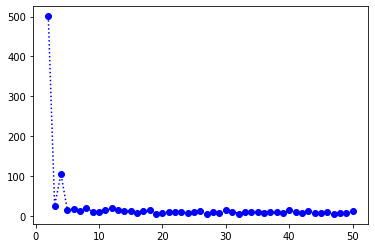

In [155]:
random.seed(9999)
Ngroups_list = arange(2, 51, 1)
Ngroups_result_list = [party(Ngroups = Ngroups, Npeople = 100, Tolerance = 0.25, max_iteration = 500) for Ngroups in Ngroups_list]
iterations = [result["Niteration"] for result in Ngroups_result_list]
plot(Ngroups_list, iterations,'b:o')

We can find that the iteration number decreases as the number of group increases. 

If we check the finial state in Ngroupw = 2, 4, 20, 50 respetively, 

<Figure size 1152x288 with 0 Axes>

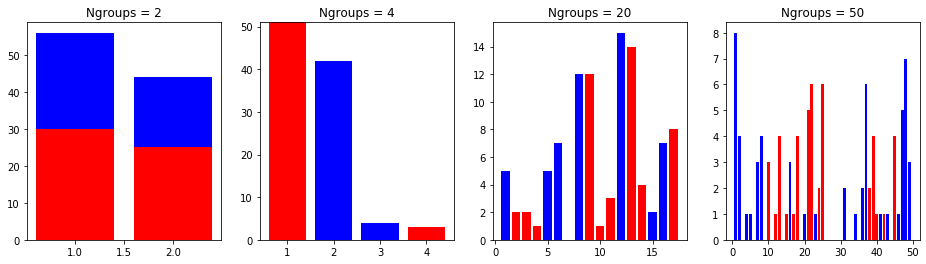

In [156]:
Ngroups_selected = [2, 4, 20, 50]
Ngroups_index = array(Ngroups_selected) - 2
Ngroups_index = Ngroups_index.astype(int)
Ngroups_counts_list = [Ngroups_result_list[i]["counts"] for i in Ngroups_index]
plot_party_subplot(Ngroups_counts_list, "Ngroups", Ngroups_selected)

Form the above result, 

1. If the party has only two rooms (groups), convergence only occurs at some special conditions. (E.g. men and women are seperated exactly in the two groups initally.) Otherwise, it has very little chance to converge. Take [Ngroups = 2] simulation as an example: every unhappy person will leave from currnet room to the othor room, however, there are only two rooms. They will meet at the same another room in the next run, and they will leave, meet, .... So it will never converge in this situation.
2. In the party with Ngroups = 4, 20 & 50, Those situation will converge and their final states are same that men and wemen separately in different groups.


#### Change Tolerace size

I change the tolerance from 0.05 to 1 by 0.05 to run the party simulation, where the maximum iteration number is 500 to avoid infinite loops. The result is as follow

(where Ngroups = 10, Npeople = 100)

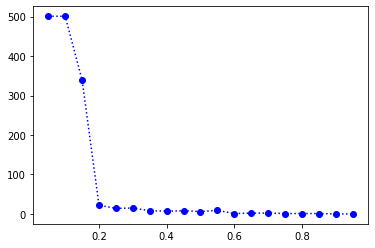

In [202]:
random.seed(9999)
Tolerance_list = arange(0.05, 1, 0.05)
Tolerance_result_list = [party(Ngroups = 10, Npeople = 100, Tolerance = Tolerance, max_iteration = 500) for Tolerance in Tolerance_list]
iterations = [result["Niteration"] for result in Tolerance_result_list]
plot(Tolerance_list, iterations,'b:o')

We can find that the iteration number decreases as the tolerance increases. 

If we check the finial state in tolerance = 0.05, 0.15, 0.2, 0.5, 0.7 and 0.95 respetively, 

<Figure size 1728x288 with 0 Axes>

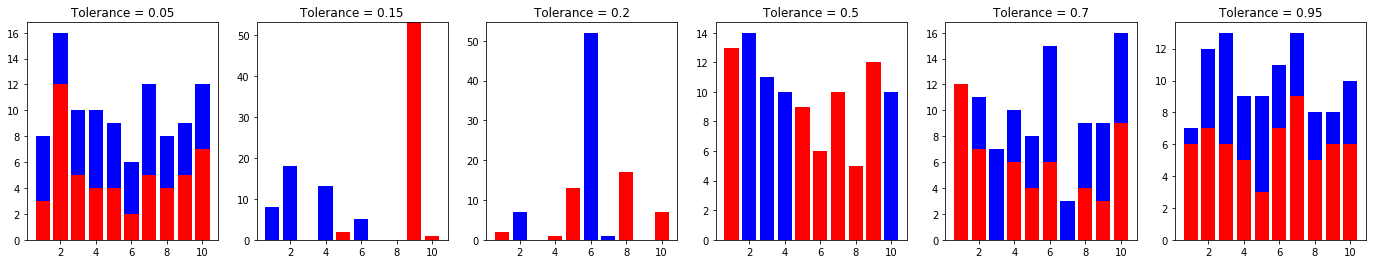

In [191]:
Tolerance_selected = [0.05, 0.15, 0.2, 0.5, 0.7, 0.95]
Tolerance_index = array(Tolerance_selected) * 100 / (0.05*100) - 1
Tolerance_index = Tolerance_index.astype(int)
Tolerance_counts_list = [Tolerance_result_list[i]["counts"] for i in Tolerance_index]
plot_party_subplot(Tolerance_counts_list, "Tolerance", Tolerance_selected)

Form the above result, we can observe that

1. It is not converged yet with Tolerance = 0.05. Maybe it needs more and more run.
2. When Tolerance $\in (0.15, 0.5)$, men and women are separated exclusively in different groups in the final stats.
3. When Tolerance $\in [0.5, 1.0]$, the final stats will probablely be that each room (group) only has one gender or mixed each both genders. Since the $Tolerance \geq 5$ means that the gneder minority in one group has higher acceptability (tolerance) to opposite gender's ratio, then it has less probability to leave the current group.

In summary, when Npeople decreases, Ngroup icreases or Tolerance increases, the converge rate increas (the number of iteration decreases).  

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

The tolerance $< 0.5$ means that the gender minority people in one group (room) can't accept too more opposite gender people, so they will change to another room until their gender ratio in that room becomes the majority. Therefore, only when just group has only one gender can satisfy this situation. It is why the simulaiton leads to group polarization. But when we enhance the tolerance value $\geq 0.5$, it is probabele that differenct gender could stay in same group at the same time. 

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

$$
\begin{align*}
& 0 = \frac{dy}{dt} = -Ay+(B-y) \times E-(y-C) \times I \\
\Rightarrow \quad & y(A + E + I) = B \times E + C \times I \\
\Rightarrow \quad & y = \frac{B \times E + C \times I}{A + E + I}
\end{align*}
$$

where $A+E+I$ is not 0.


### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


#### Numerical approach

In [26]:
def eulerIntegrate(A, B, C, E, I, t_lower = 0, t_upper = 10, dt = 0.1, y_initial = 0.1, plot_true_value = False):
    y = [y_initial]
    t = np.arange(t_lower,t_upper,dt)
    for i in t:
        y1 = y[-1] # the last element
        y2 = y1+dt*(-A*y1+(B-y1)*E-(y1-C)*I) # Euler integration
        y.append(y2)
    fig = figure()
    plot(t, y[0:-1], 'bo:', markerfacecolor='None'); # approximation
    if plot_true_value == True:
        C1 = log(y_initial*(A+E+I)-B*E-C*I)/(A+E+I)+t[0]
        true_y = (B*E+C*I+exp((C1-t)*(A+E+I)))/(A+E+I)
        plot(t, true_y, 'r-')
    show()
    print("The converge value of y, where dy/dt=0, is %.2f.\n" % y[-1])
    print("The equilibrium value (B*E+C*I)/(A+E+I) = %.2f.\n" % ((B*E+C*I)/(A+E+I)))


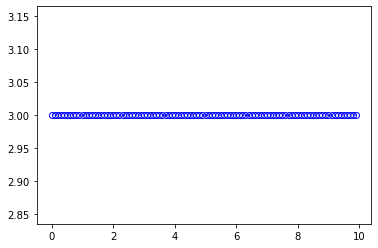

The converge value of y is 3.00.

The equilibrium value (B*E+C*I)/(A+E+I) is 3.00.



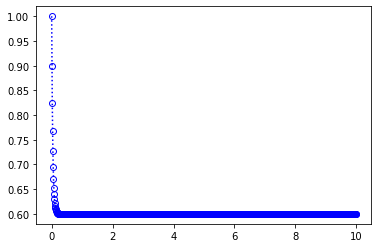

The converge value of y is 0.60.

The equilibrium value (B*E+C*I)/(A+E+I) is 0.60.



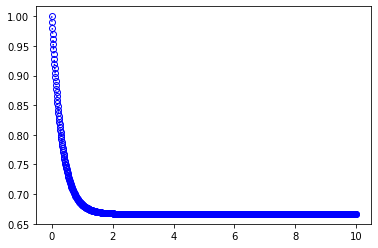

The converge value of y is 0.67.

The equilibrium value (B*E+C*I)/(A+E+I) is 0.67.



In [127]:
eulerIntegrate(A = 0, B = 3, C = 0, E = 3, I = 0, dt = 0.1, y_initial = 3) 
eulerIntegrate(A = 10, B = 0.5, C = 3, E = 12, I = 3, dt = 0.01, y_initial = 1)
eulerIntegrate(A = 1, B = 1, C = 1, E = 1, I = 1, dt = 0.01, y_initial = 1) 
# Notice: dt should be sufficent small or y(t) will be diverge as t approaching infinity

From above results, we can find when $\frac{dy}{dt}$ is aproaching to 0 as t increases. In the long run, the value y(t) will converge to $\frac{B \times E + C \times I}{A + E + I}$ which is identical to the result in Exercise 2.1.

#### Symbolic approach

In [44]:
A, B, C, E, I, t = sym.symbols("A, B, C, E, I, t")
y = sym.Function("y")(t)
sym.dsolve(y.diff()+A*y-(B-y)*E+(y-C)*I) # solving dy/dt-(A*y-(B-y)*E+(y-C)*I)=0

Eq(y(t), (B*E + C*I + exp((C1 - t)*(A + E + I)))/(A + E + I))

where $C_1$ is some constant, which can be solved by setting an "reasonable" initial value. Otherwise, we can find some constrains in above equation: 

1. $A+E+I \neq 0$;
2. $y(t) \times (A+E+I) - BE - CI = e^{(C_1-t)(A+E+I)} >= 0$.

Therefore, when we simulate this equation, we should carefully set $A,B,C,E,I$ and initial point with reasonable value!

If we see the limit of $y(t)$  
$$
\lim_{t \to \infty} y(t) = \lim_{t \to \infty} \frac{BE+CI+e^{(C_1-t)(A+E+I)}}{A+E+I} = \frac{BE+CI}{A+E+I}
$$
will converge on $\frac{BE+CI}{A+E+I}$ as $t \to \infty$ and the its derivation is also approach to 0. It shows that the numerical method (Eurel integration) is as same as the analytical method. Below is using symbolic approach (red line) to double check previous results. 


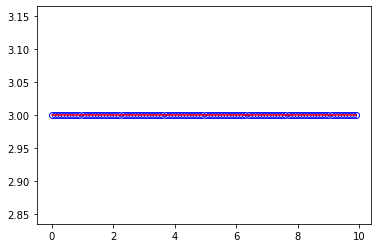

The converge value of y is 3.00.

The equilibrium value (B*E+C*I)/(A+E+I) is 3.00.



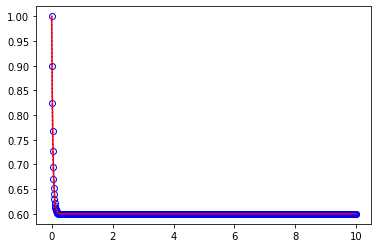

The converge value of y is 0.60.

The equilibrium value (B*E+C*I)/(A+E+I) is 0.60.



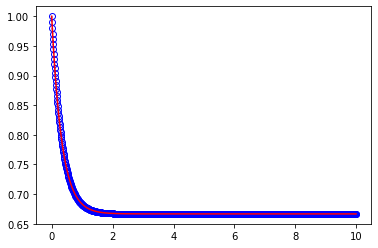

The converge value of y is 0.67.

The equilibrium value (B*E+C*I)/(A+E+I) is 0.67.



In [126]:
eulerIntegrate(A = 0, B = 3, C = 0, E = 3, I = 0, dt = 0.1, y_initial = 3, plot_true_value = True)
eulerIntegrate(A = 10, B = 0.5, C = 3, E = 12, I = 3, dt = 0.01, y_initial = 1, plot_true_value = True)
eulerIntegrate(A = 1, B = 1, C = 1, E = 1, I = 1, y_initial = 1, dt = 0.01, plot_true_value = True) 

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for $t=[0,10]$ & $y(t=0)=0$.

This is an example of time-varying rather than constant excitation.

Note: E at t = 5 is not defined, so y(t) is not a continuous function. To the convenience, I set 
$E = \begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t\color{red}{\geq}5
\end{cases}$
for the following paragraph in private.

#### Symbolic approach

In [52]:
y_t_less5 = sym.Function("y_l")(t)
sym.dsolve(y_t_less5.diff()+y_t_less5-1) # solving dy/dt+1=0

Eq(y_l(t), C1*exp(-t) + 1)

In [53]:
y_t_great5 = sym.Function("y_g")(t)
sym.dsolve(y_t_great5.diff()+y_t_great5) # solving dy/dt+1=0

Eq(y_g(t), C1*exp(-t))

Since we have initial value $y(t= 0) = 0$, the coefficient $C1$ in the first equaction is
$$
\begin{align}
&0 = y_l(t=0) = C_1e^{-t}+1 \\
\Rightarrow \quad &C_1 = -1
\end{align}
$$
and the coefficient $C1$ in the second equaction must satisfy 
$$
\begin{align}
&\lim_{t \to 5^-}y_l(t) = \lim_{t \to 5^+}y_g(t) \\
\Rightarrow \quad &-1 e^{-5} + 1 = C_1 e^{-5} \\
\Rightarrow \quad &C_1 = -1 + e^{5}
\end{align}
$$
Therefore, the equation is equal to 
$$
y(t) = 
\begin{cases}
e^{-t} + 1 &\text{ if } 0 \leq t < 5 \\
 (-1+e^5) e^{-t} &\text{ if } 5 \leq t \leq 10
\end{cases}
$$

#### Numerical approach

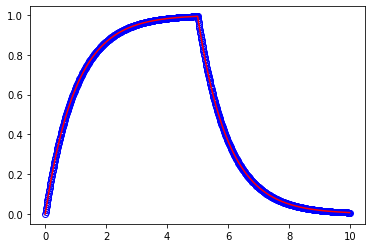

In [92]:
dt = 0.01
y = [0] # the initial value y(0) = 0
y_true = []
t = np.arange(0, 10,dt)
for i in t:
    y1 = y[-1] # the last element
    E = 1 if i < 5 else 0 # the indicator function 
    y2 = y1+dt*(-y1+E) # Euler integration
    y.append(y2)
    if i < 5:
        y_true.append(-exp(-i)+1)
    else:
        y_true.append((-1+exp(5))*exp(-i))
plot(t, y[0:-1],'bo:', markerfacecolor='None'); # approximation
plot(t, y_true, 'r-', markerfacecolor='None')
show()

It shows that $y(t)$ increases as t increases before $t < 5$ and its increasing rate is decreasing. When $t geq 5$, however, $y(t)$ decreases rapidly and its rate is slowing down. Finally $y(t)$ reachs back to 0 (very close but not 0) as $t$ approachs to 10. 
Otherwise, we can find the Euler integration method (numerical approach, blue dot) is identical to the symbolic approch (red line).
